# **Mentorness | Machine Learning | One Month | Remote Internship**

---

## **Task No# 02:- Market Price Prediction:**


### **Objective:**
   - The primary objective of this project is to develop a robust time series machine learning model capable of accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim to predict the quantity and prices of commodities for future months, empowering stakeholders to make proactive decisions regarding production, procurement, pricing strategies, and resource allocation.


### **Data Description:**
  - The dataset comprises the following columns:
    1) **market:** The market or commodity under consideration.
    2) **month:** The month for which the data is recorded.
    3) **year:** The year corresponding to the recorded data.
    4) **quantity:** The quantity of the commodity traded or available.
    5) **priceMin:** The minimum price of the commodity during the month.
    6) **priceMax:** The maximum price of the commodity during the month. 
    7) **priceMod:** The mode or most frequently occurring price of the commodity during the month.
    8) **state:** The state or region where the market is located.
    9) **city:** The city where the market is situated.
    10) **date:** The specific date of the recorded data.

### **Task:**
   **The task involves several key steps:**
   1. **Data Preprocessing:** Cleaning the dataset, handling missing values, and encoding categorical variables.
   2. **Exploratory Data Analysis (EDA):** Analyzing the temporal patterns, identifying seasonality, trends, and
   anomalies within the data.
   3. **Feature Engineering:** Creating relevant features such as lagged variables, rolling statistics, and seasonal
   indicators.
   4. **Model Selection and Training:** Evaluating various time series forecasting models such as ARIMA,
   SARIMA, Prophet, and LSTM, selecting the most suitable one, and training it on the dataset.
   5. **Model Evaluation:** Assessing the model's performance using appropriate metrics such as Mean Absolute
   Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
   6. **Fine-tuning and Validation:** Fine-tuning the model parameters, validating its performance on unseen
   data, and iterating if necessary.



---

#### **Step No# 01: Data Preprocessing:** 
   - Cleaning the dataset, handling missing values, duplicates values, and encoding categorical variables.

- ##### **Import Libraries:**

In [1]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
import tensorflow
from keras.models import Sequential
from keras.layers import LSTM, Dense
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure that plots are displayed inline within the Jupyter Notebook
%matplotlib inline

import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

 - ##### **Load the "Market Price Prediction" Dataset:**

In [2]:
# Load the "Market Price Prediction" Dataset
df = pd.read_csv("MarketPricePrediction.csv")

In [3]:
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


 - ##### **Information of Dataset:**

In [4]:
# Information of dataset:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


- ##### **Convert "date" column to datetime format:**

In [5]:
# Convert "date" column to datetime format
df['date'] = pd.to_datetime(df['date'])

 - ##### **Set "date" column as the index:**

In [6]:
# Set "date" column as the index
df.set_index('date', inplace=True)

 - ##### **Now "date" column is the index:**

In [7]:
# Now "date" column is the index
df.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR


 - ##### **Summary Statisics:**

In [8]:
# Summary Statisics:
df.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


# 

 - ##### **Handling missing values & Check for missing values:**

In [9]:
# Handling missing values & Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
dtype: int64


 - ##### **Check for duplicates:**

In [10]:
# Check for duplicates
duplicates = df.duplicated()
print("Number of duplicate rows:", duplicates.sum())

Number of duplicate rows: 0


 - ##### **Encoding categorical variables:**

In [11]:
# Encode categorical variables
label_encoder = LabelEncoder()
df['market'] = label_encoder.fit_transform(df['market'])
df['state'] = label_encoder.fit_transform(df['state'])
df['city'] = label_encoder.fit_transform(df['city'])

 - ##### **Select numeric columns for resampling:**

In [12]:
# Select numeric columns for resampling
numeric_columns = df.select_dtypes(include=[np.number]).columns
monthly_data = df[numeric_columns].resample('M').mean()

---

#### **Step No# 02: Exploratory Data Analysis (EDA):** 
  - Analyzing the temporal patterns, identifying seasonality, trends, and anomalies within the data.

 - ##### **Plotting the price statistics over time:**

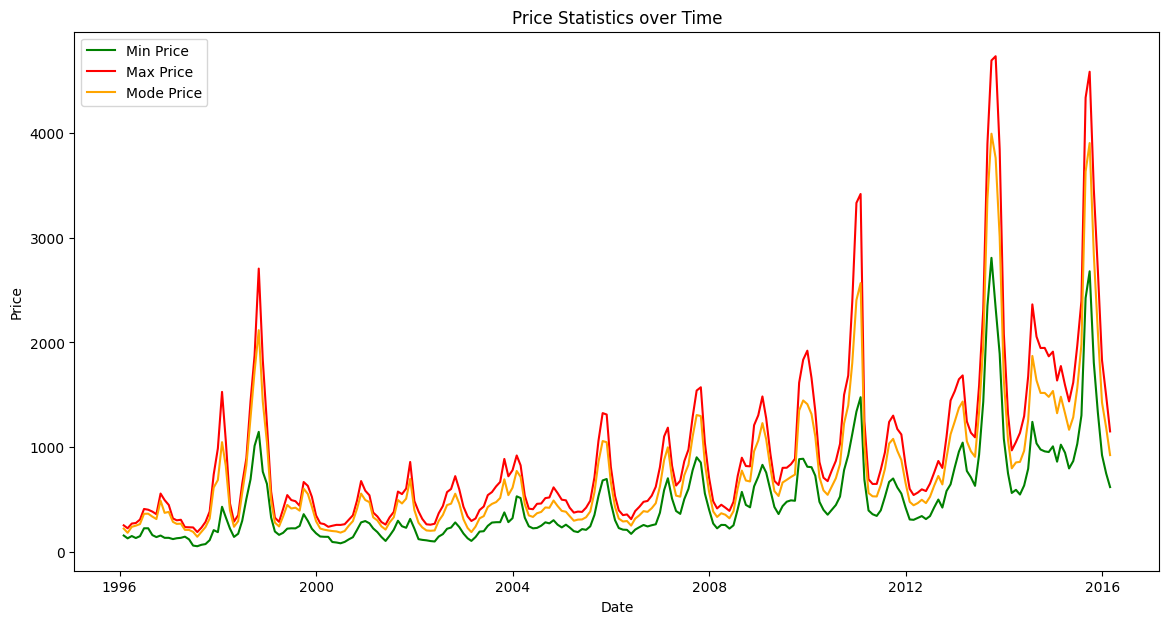

In [13]:
# Plotting the price statistics over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['priceMin'], label='Min Price', color='green')
plt.plot(monthly_data['priceMax'], label='Max Price', color='red')
plt.plot(monthly_data['priceMod'], label='Mode Price', color='orange')
plt.title('Price Statistics over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

 - ##### **Plotting the quantity over time:** 

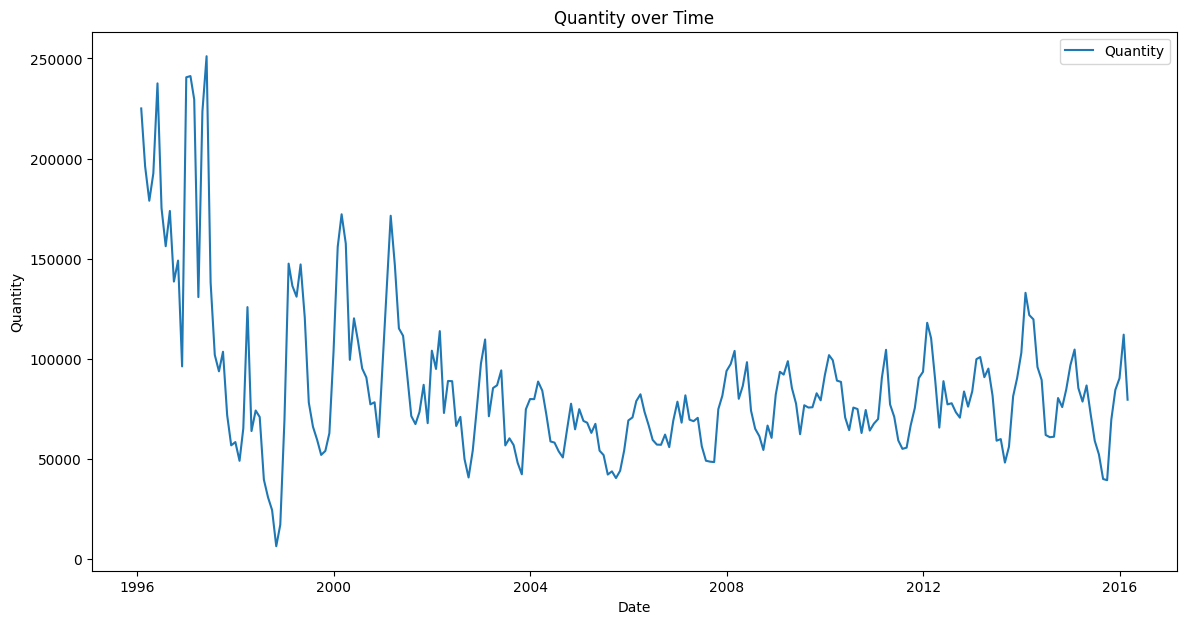

In [14]:

# Plotting the quantity over time
plt.figure(figsize=(14, 7))
plt.plot(monthly_data['quantity'], label='Quantity')
plt.title('Quantity over Time')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

 - ##### **Decompose the Time Series:**

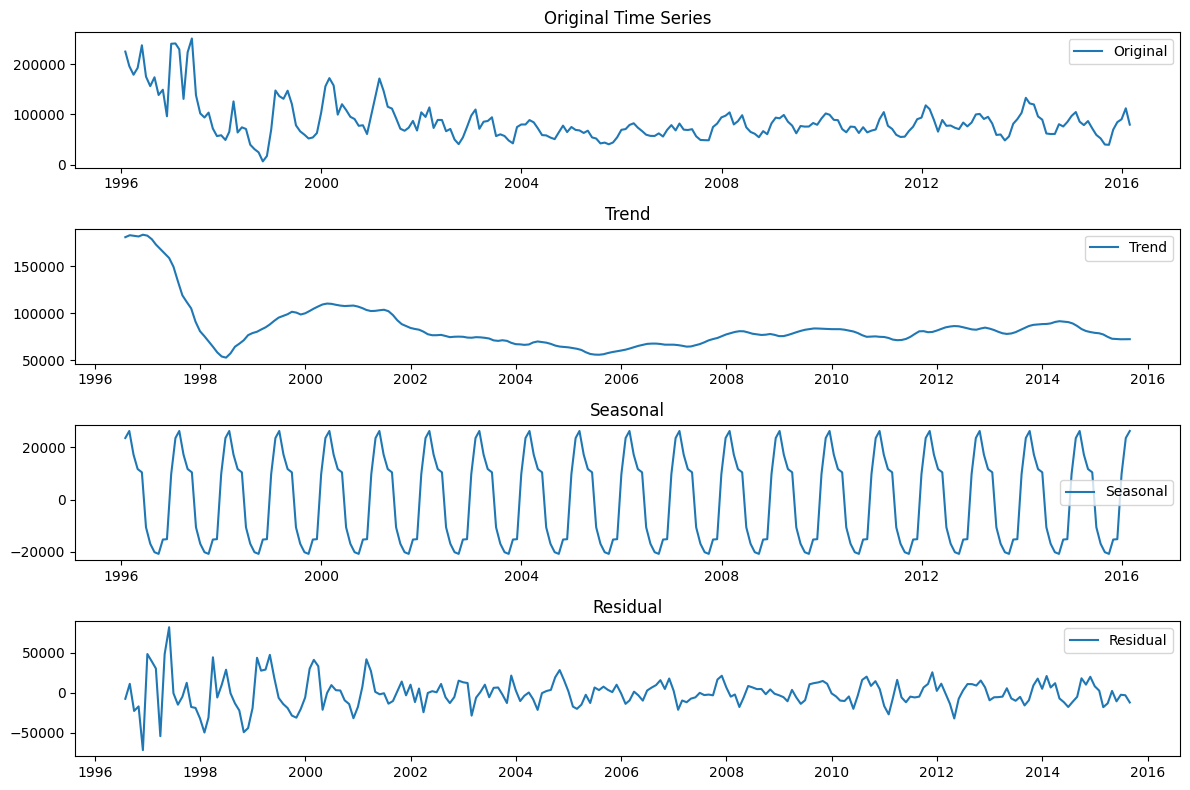

In [15]:
# Ensure the time series is univariate. Here, we use 'quantity' as the example column.
decomposition = seasonal_decompose(monthly_data['quantity'], model='additive')

# Extract components
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot the decomposed components
plt.figure(figsize=(12, 8))

plt.subplot(411)
plt.plot(monthly_data['quantity'], label='Original')
plt.legend(loc='best')
plt.title('Original Time Series')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.title('Trend')

plt.subplot(413)
plt.plot(seasonal, label='Seasonal')
plt.legend(loc='best')
plt.title('Seasonal')

plt.subplot(414)
plt.plot(residual, label='Residual')
plt.legend(loc='best')
plt.title('Residual')

plt.tight_layout()
plt.show()

 - ##### **Identify seasonality** 
  
  **Monthly Seasonality - Quantity:**

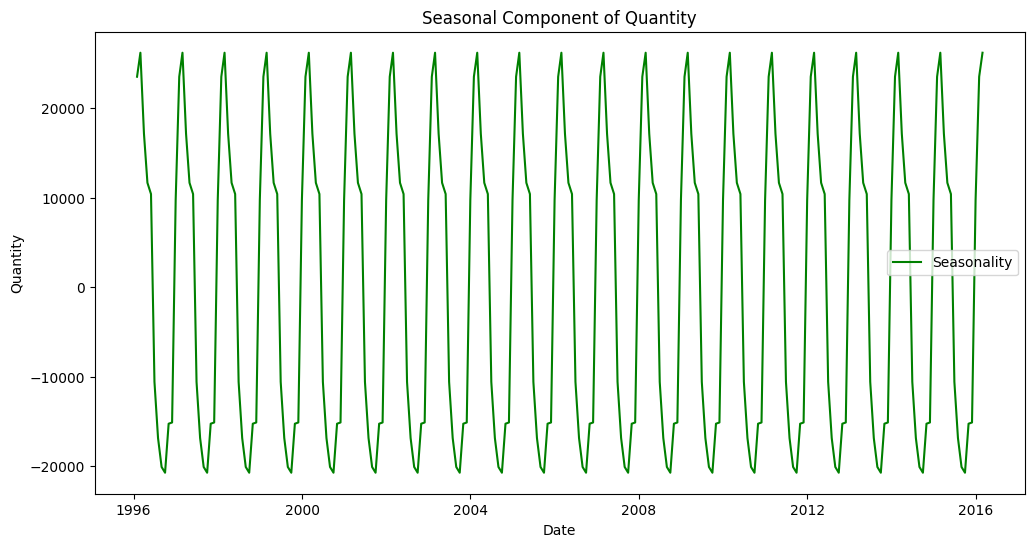

In [16]:
# Monthly Seasonality - Quantity
plt.figure(figsize=(12, 6))
plt.plot(seasonal, label='Seasonality', color='green')
plt.title('Seasonal Component of Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

 - ##### **Explore Residuals:**

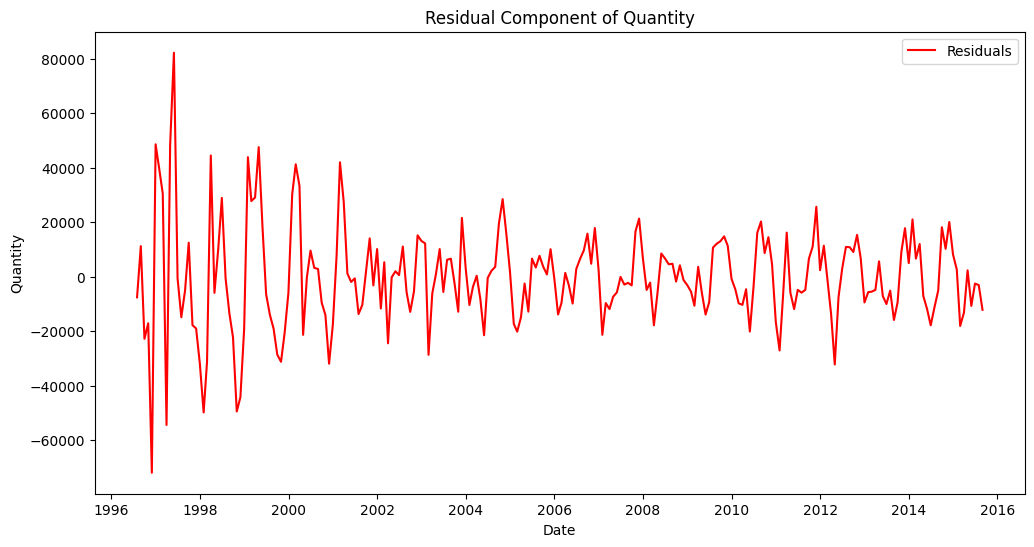

In [17]:
# Residual Component of Quantity
plt.figure(figsize=(12, 6))
plt.plot(residual, label='Residuals', color='red')
plt.title('Residual Component of Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


**Quantity vs PriceMin:**

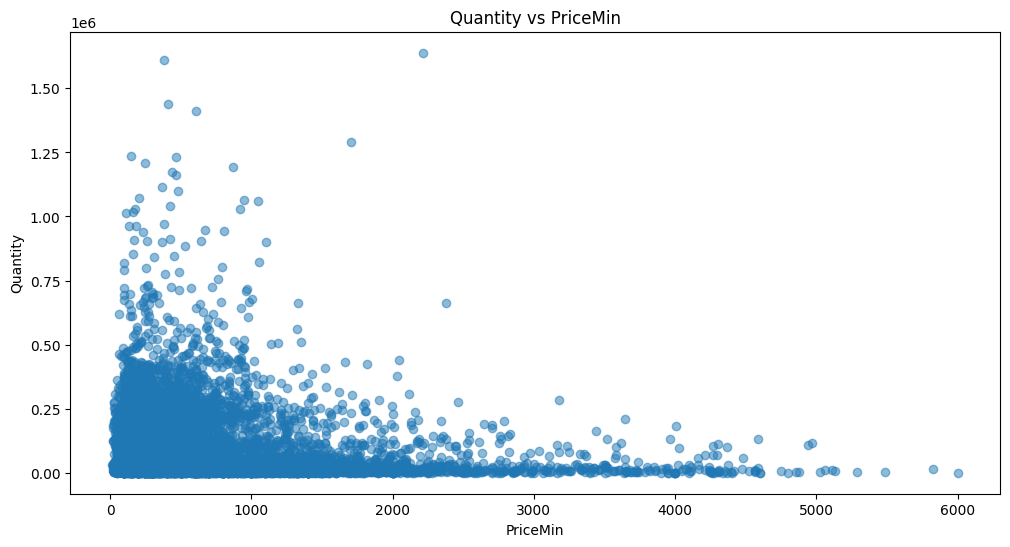

In [18]:
# Quantity vs PriceMin
plt.figure(figsize=(12, 6))
plt.scatter(df['priceMin'], df['quantity'], alpha=0.5)
plt.title('Quantity vs PriceMin')
plt.xlabel('PriceMin')
plt.ylabel('Quantity')
plt.show()

**Quantity vs PriceMod:**

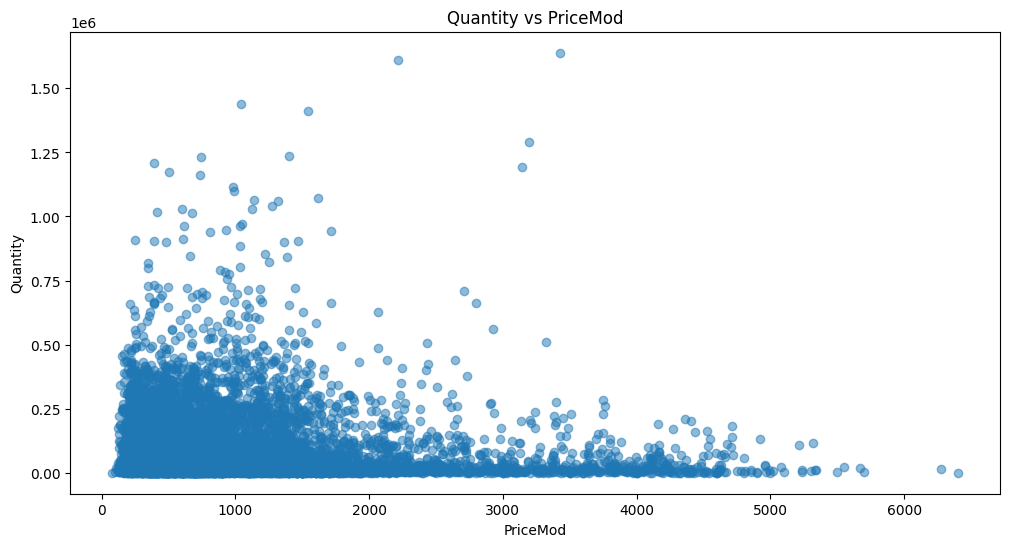

In [19]:
# Quantity vs PriceMod
plt.figure(figsize=(12, 6))
plt.scatter(df['priceMod'], df['quantity'], alpha=0.5)
plt.title('Quantity vs PriceMod')
plt.xlabel('PriceMod')
plt.ylabel('Quantity')
plt.show()

**Quantity vs PriceMax:**

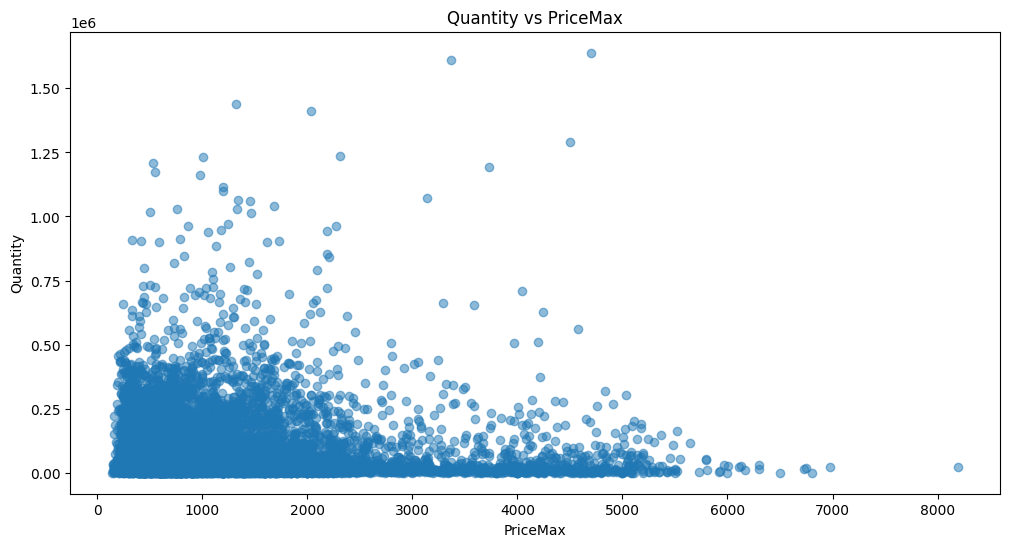

In [20]:
# Quantity vs PriceMax
plt.figure(figsize=(12, 6))
plt.scatter(df['priceMax'], df['quantity'], alpha=0.5)
plt.title('Quantity vs PriceMax')
plt.xlabel('PriceMax')
plt.ylabel('Quantity')
plt.show()

 - ##### **Explore Trends:**
  **Trends Component of Quantity:** 

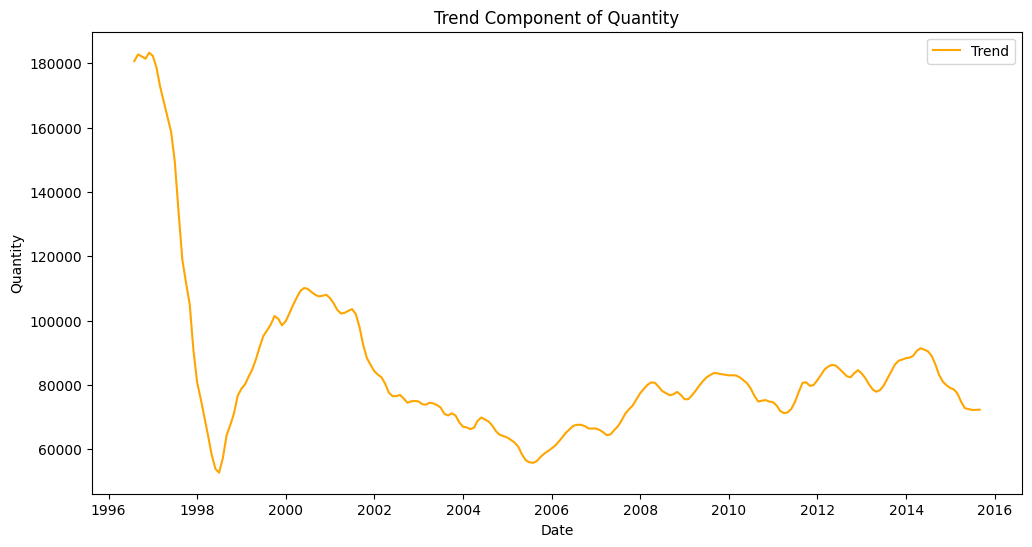

In [21]:
# Trends Component of Quantity
plt.figure(figsize=(12, 6))
plt.plot(trend, label='Trend', color='orange')
plt.title('Trend Component of Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()


- ##### **Z-score for Anomaly Detection:**

In [22]:
# Z - Score for Anomaly Detection
df['quantity_zscore'] = zscore(df['quantity'])
anomalies = df[np.abs(df['quantity_zscore']) > 3]
print("Anomalies based on Z-score:")
anomalies.head()

Anomalies based on Z-score:


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,quantity_zscore
date,,,,,,,,,,
2014-03-01,3,March,2014,453107,100,960,598,14,3,3.026481
2014-12-01,3,December,2014,474988,127,2249,1175,14,3,3.202369
2012-01-01,9,January,2012,531906,161,736,583,12,9,3.659900
2014-01-01,9,January,2014,606710,404,1296,1094,12,9,4.261206
2015-01-01,9,January,2015,583681,313,1967,1602,12,9,4.076089


 - ##### **Plot Anomalies:**
     - Highlight anomalies on the time series plot.

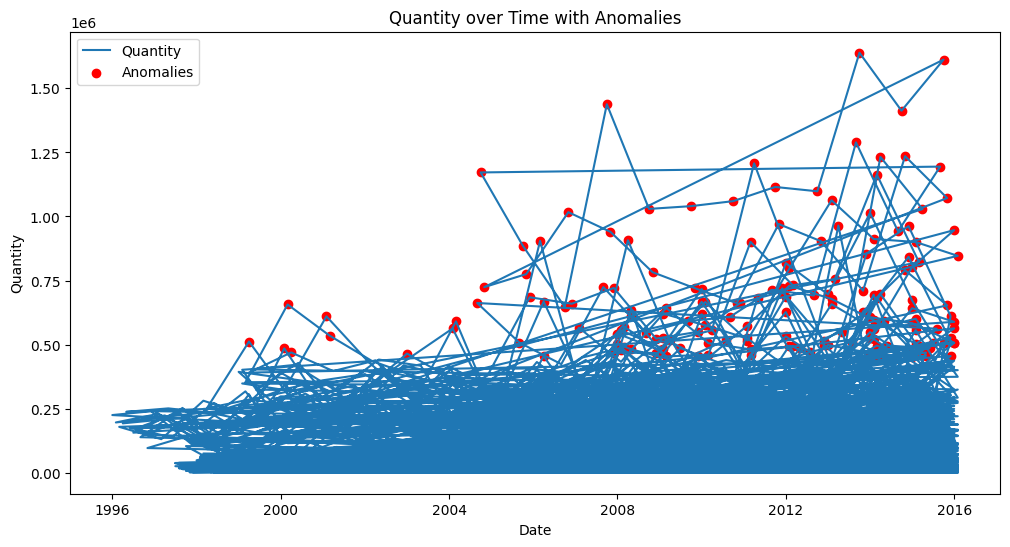

In [23]:
# Plot Anomalies:
# Highlight anomalies on the time series plot.
plt.figure(figsize=(12, 6))
plt.plot(df['quantity'], label='Quantity')
plt.scatter(anomalies.index, anomalies['quantity'], color='red', label='Anomalies')
plt.title('Quantity over Time with Anomalies')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

 - ##### **Analyze anomalies in context with other variables:**

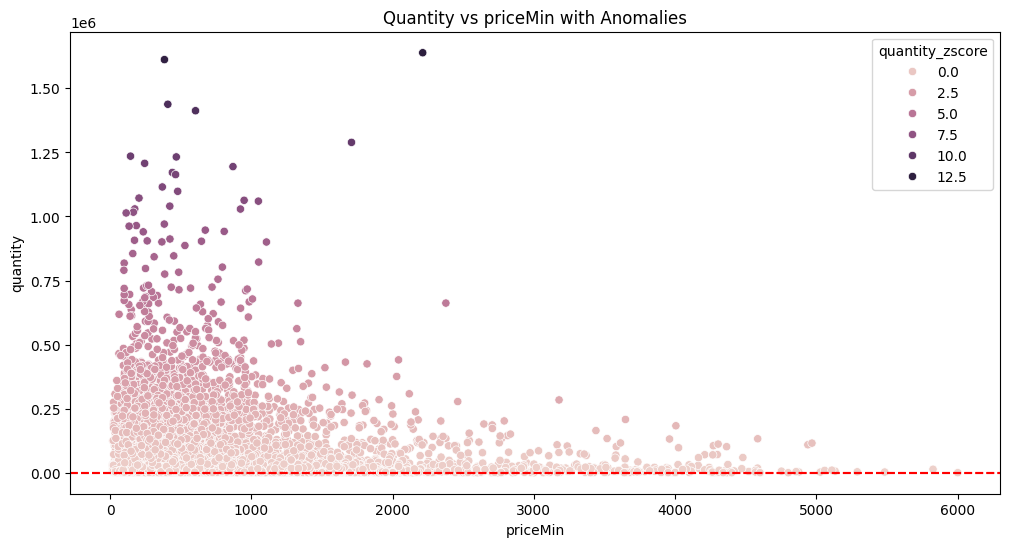

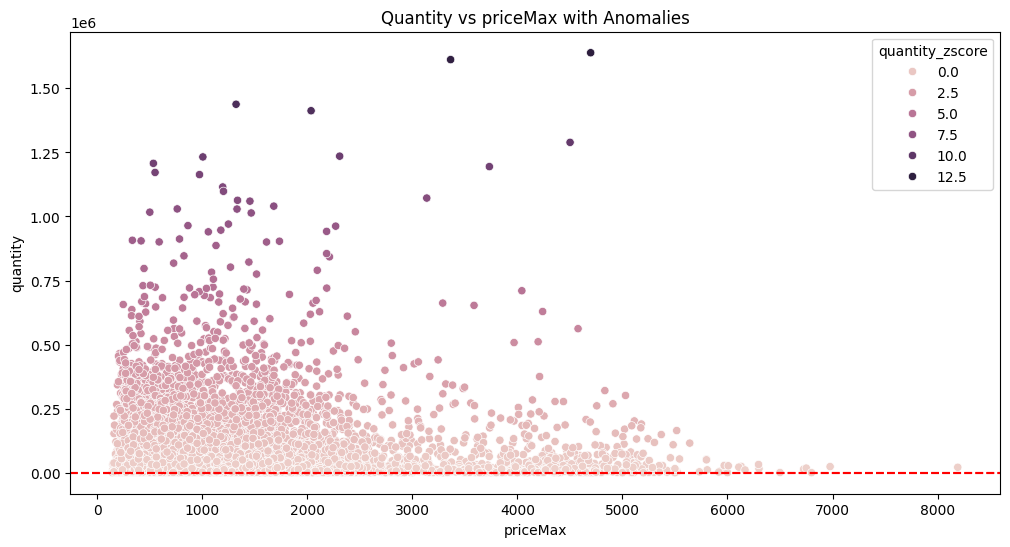

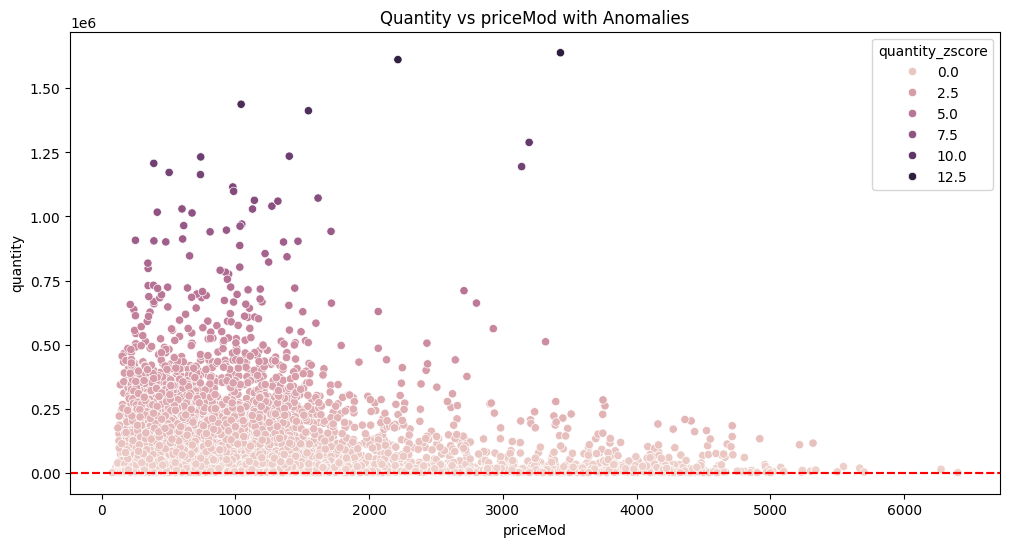

In [24]:
# Analyze anomalies in context with other variables.
for col in ['priceMin', 'priceMax', 'priceMod']:
    plt.figure(figsize=(12, 6))
    sns.scatterplot(data=df, x=col, y='quantity', hue='quantity_zscore')
    plt.title(f'Quantity vs {col} with Anomalies')
    plt.axhline(y=3, color='r', linestyle='--')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.show()


---

#### **Step No# 03: Feature Engineering:** 
   - Creating relevant features such as lagged variables, rolling statistics, and seasonal indicators.

In [25]:
# Lagged variables
# Create lagged variables for 'quantity' and 'priceMod'
lags = [1, 3, 6, 12]  # Define the lag periods
for lag in lags:
    df[f'quantity_lag_{lag}'] = df['quantity'].shift(lag)
    df[f'priceMod_lag_{lag}'] = df['priceMod'].shift(lag)

# Rolling statistics
# Create rolling statistics for 'quantity' and 'priceMod'
windows = [3, 6, 12]  # Define the window sizes
for window in windows:
    df[f'quantity_roll_mean_{window}'] = df['quantity'].rolling(window=window).mean()
    df[f'priceMod_roll_mean_{window}'] = df['priceMod'].rolling(window=window).mean()

# Seasonal indicators
# Create seasonal indicators based on month or quarter
df['month'] = df.index.month
df['quarter'] = df.index.quarter
data = pd.get_dummies(df, columns=['month', 'quarter'], drop_first=True)

# Drop rows with NaN values resulting from lagged variables and rolling statistics
df.dropna(inplace=True)

# Print the first few rows of the dataset with engineered features
print("Dataset with Engineered Features.")
df.head()

Dataset with Engineered Features.


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,quantity_zscore,...,priceMod_lag_6,quantity_lag_12,priceMod_lag_12,quantity_roll_mean_3,priceMod_roll_mean_3,quantity_roll_mean_6,priceMod_roll_mean_6,quantity_roll_mean_12,priceMod_roll_mean_12,quarter
date,,,,,,,,,,,,,,,,,,,,,
2012-02-01,0,2,2012,675,510,650,570,16,0,-0.610356,...,1256.0,2350.0,446.0,510.000000,1005.666667,1005.833333,889.000000,843.333333,1188.000000,1
2013-02-01,0,2,2013,845,1400,1843,1629,16,0,-0.608989,...,1613.0,900.0,563.0,606.666667,1108.000000,929.166667,891.666667,838.750000,1276.833333,1
2014-02-01,0,2,2014,1115,831,1163,983,16,0,-0.606819,...,324.0,790.0,1460.0,878.333333,1060.666667,881.666667,1001.500000,865.833333,1237.083333,1
2015-02-01,0,2,2015,1115,1200,1946,1688,16,0,-0.606819,...,380.0,245.0,3433.0,1025.000000,1433.333333,767.500000,1219.500000,938.333333,1091.666667,1
2005-03-01,0,3,2005,900,281,357,322,16,0,-0.608547,...,1322.0,1035.0,605.0,1043.333333,997.666667,825.000000,1052.833333,927.083333,1068.083333,1


---

#### **Step No: 4. Model Selection and Training:** 
   - Evaluating various time series forecasting models such as ARIMA, SARIMA, Prophet, and LSTM, selecting the most suitable one, and training it on the dataset.

   - **Split the data into train and test sets:**

In [26]:
# Split the data into train and test sets
train_size = int(len(df) * 0.8)  # 80% train, 20% test
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

 - ##### **ARIMA Model:**

In [27]:
# ARIMA model
arima_model = ARIMA(train_data['quantity'], order=(5,1,0))
arima_result = arima_model.fit()

 - ##### **SARIMA Model:**

In [28]:
# SARIMA model
sarima_model = SARIMAX(train_data['quantity'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_result = sarima_model.fit()

 - ##### **LSTM Model:**

In [29]:
# LSTM model
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train_data[['quantity', 'priceMod']])
test_scaled = scaler.transform(test_data[['quantity', 'priceMod']])

In [30]:
def create_sequences(df, n_steps):
    X, y = [], []
    for i in range(len(df)):
        end_ix = i + n_steps
        if end_ix > len(df)-1:
            break
        seq_x, seq_y = df[i:end_ix, :], df[end_ix, :]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [31]:
# Define number of time steps
n_steps = 12  
X_train, y_train = create_sequences(train_scaled, n_steps)
X_test, y_test = create_sequences(test_scaled, n_steps)

In [32]:
model = Sequential([
    LSTM(200, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(2)
])
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_data=(X_test, y_test), verbose=0)

 - ##### **Evaluate Models:**

In [33]:
# Evaluate models
arima_predictions = arima_result.forecast(len(test_data))
sarima_predictions = sarima_result.get_forecast(len(test_data)).predicted_mean
lstm_predictions = model.predict(X_test)

64/64 [==============================] - 2s 13ms/step


In [34]:

# Check lengths
print("Length of test_data.index:", len(test_data.index))
print("Length of ARIMA predictions:", len(arima_predictions))
print("Length of SARIMA predictions:", len(sarima_predictions))
print("Length of LSTM predictions:", len(lstm_predictions))

# Adjust the test_data.index to match the length of lstm_predictions
adjusted_index = test_data.index[-len(lstm_predictions):]

Length of test_data.index: 2043
Length of ARIMA predictions: 2043
Length of SARIMA predictions: 2043
Length of LSTM predictions: 2031


 - ##### **Plot Actual vs. Predicted values:**

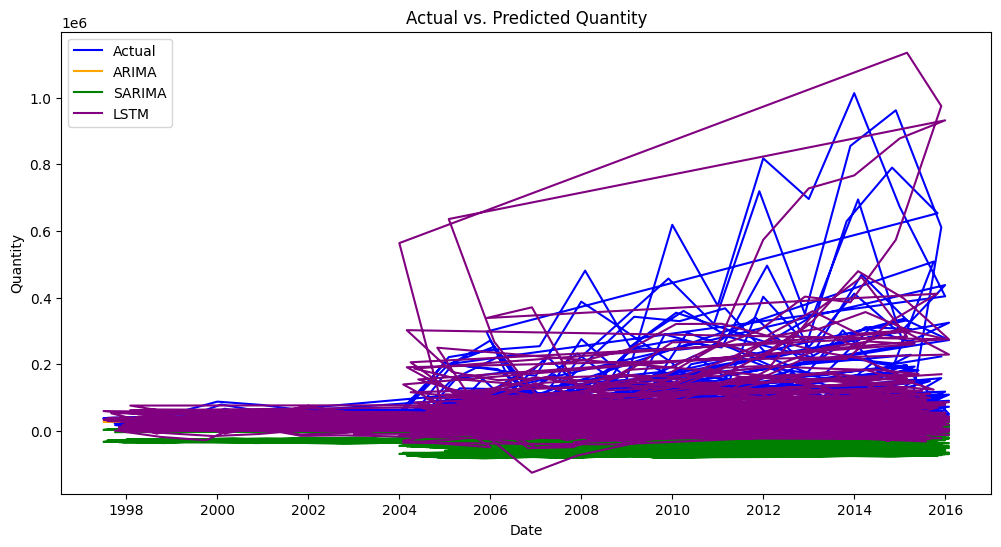

In [35]:
# Actual vs Prediction values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['quantity'], label='Actual', color='blue')
plt.plot(test_data.index, arima_predictions, label='ARIMA', color='orange')
plt.plot(test_data.index, sarima_predictions, label='SARIMA', color='green')
plt.plot(adjusted_index, scaler.inverse_transform(lstm_predictions)[:, 0], label='LSTM', color='purple')
plt.title('Actual vs. Predicted Quantity')
plt.xlabel('Date')
plt.ylabel('Quantity')
plt.legend()
plt.show()

#### **Step No# 5: Model Evaluation:** 
  - Assessing the model's performance using appropriate metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

  - ##### **Evaluate ARIMA Model:**

In [36]:
# Evaluate ARIMA model
arima_mae = mean_absolute_error(test_data['quantity'], arima_predictions)
arima_mse = mean_squared_error(test_data['quantity'], arima_predictions)
arima_rmse = np.sqrt(arima_mse)

print("ARIMA Model:")
print("MAE:", arima_mae)
print("MSE:", arima_mse)
print("RMSE:", arima_rmse)

ARIMA Model:
MAE: 38797.42718695649
MSE: 7624129940.102239
RMSE: 87316.26389225686


 - ##### **Evaluate SARIMA Model:**

In [37]:
# Evaluate SARIMA model
sarima_mae = mean_absolute_error(test_data['quantity'], sarima_predictions)
sarima_mse = mean_squared_error(test_data['quantity'], sarima_predictions)
sarima_rmse = np.sqrt(sarima_mse)

print("SARIMA Model:")
print("MAE:", sarima_mae)
print("MSE:", sarima_mse)
print("RMSE:", sarima_rmse)

SARIMA Model:
MAE: 74191.67578685867
MSE: 14552962529.719612
RMSE: 120635.66027389916


 - ##### **Evaluate LSTM Model:**

In [38]:

# Adjust the test_data to match the length of lstm_predictions
adjusted_test_data = test_data[-len(lstm_predictions):]

# Inverse transform the LSTM predictions
lstm_predictions_inverse = scaler.inverse_transform(lstm_predictions)[:, 0]

# Evaluate LSTM model
lstm_mae = mean_absolute_error(adjusted_test_data['quantity'], lstm_predictions_inverse)
lstm_mse = mean_squared_error(adjusted_test_data['quantity'], lstm_predictions_inverse)
lstm_rmse = np.sqrt(lstm_mse)

print(f'LSTM Mean Absolute Error: {lstm_mae}')
print(f'LSTM Mean Squared Error: {lstm_mse}')
print(f'LSTM Root Mean Squared Error: {lstm_rmse}')

LSTM Mean Absolute Error: 27490.550929969195
LSTM Mean Squared Error: 3383204078.305734
LSTM Root Mean Squared Error: 58165.31679880833
